In [1]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

# Dosyanƒ±zƒ±n Drive'daki yolunu buraya yazƒ±n
#Drive'dan datasetini colaba y√ºkle.
excel_file_path = '/content/drive/MyDrive/datasett.xlsx' # Placeholder path
df = pd.read_excel(excel_file_path, engine='openpyxl')


# ƒ∞lk 5 satƒ±rƒ± g√∂ster
print("ƒ∞lk 5 satƒ±r:")
print(df.head())

# S√ºtun bilgilerini ve data typelarƒ± g√∂ster
print("\nS√ºtun Bilgileri:")
print(df.info())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ƒ∞lk 5 satƒ±r:
                                        √úr√ºn Adƒ± 2025-01-13 00:00:00  \
0                   HP 255 G9 (9M3G7AT) Notebook               13400   
1        Technopc Notebook Aura T114N37 Notebook                7400   
2          MSI Titan 18 HX A14VIG-067TR Notebook              230000   
3     MSI Stealth 18 HX AI A2XWHG-024TR Notebook                 NaN   
4  Asus ROG Strix Scar 18 G834JY-N6040W Notebook                 NaN   

  2025-01-17 00:00:00 2025-01-20 00:00:00 2025-02-02 00:00:00  \
0               13200               12500               12500   
1                7400                7400                7400   
2              220000              230000              230000   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

  2025-02-07 00:00:00 2025-02

In [2]:
import pandas as pd
import numpy as np

# pandas'ƒ±n melt fonksiyonunu kullanarak DataFrame'i "geni≈ü" formattan "uzun" formata √ßevir
df_long = pd.melt(df, id_vars=['√úr√ºn Adƒ±'], var_name='Tarih', value_name='Fiyat')


# --- Data Cleaning and Preparation ---

# 'Tarih' s√ºtununu datetime nesnelerine d√∂n√º≈üt√ºr
df_long['Tarih'] = pd.to_datetime(df_long['Tarih'], errors='coerce')

# 'Fiyat' s√ºtununu sayƒ±sal (numeric) t√ºre d√∂n√º≈üt√ºr
df_long['Fiyat'] = pd.to_numeric(df_long['Fiyat'], errors='coerce')

# Fiyatƒ± 0 olan deƒüerleri de NaN olarak i≈üaretle.
df_long['Fiyat'] = df_long['Fiyat'].replace(0, np.nan)


# √úr√ºn adƒ±na ve tarihe g√∂re sƒ±ralayalƒ±m, √ß√ºnk√º interpolasyon i√ßin √∂nemli
df_long.sort_values(by=['√úr√ºn Adƒ±', 'Tarih'], inplace=True)

# Bo≈ü (NaN) fiyat deƒüerlerini interpolasyon ile dolduralƒ±m
# Her √ºr√ºn i√ßin ayrƒ± ayrƒ± interpolasyon yap
df_long['Fiyat'] = df_long.groupby('√úr√ºn Adƒ±')['Fiyat'].transform(lambda x: x.interpolate(method='linear', limit_direction='both'))

# Interpolasyondan sonra hala NaN kalmƒ±≈ü olabilir (mesela bir √ºr√ºn√ºn hi√ß fiyatƒ± yoksa veya tek veri noktasƒ±ysa)
# Bu satƒ±rda, interpolasyon sonrasƒ± kalan NaN deƒüer i√ßeren satƒ±rlarƒ± siliyoruz.
df_long.dropna(subset=['√úr√ºn Adƒ±', 'Tarih', 'Fiyat'], inplace=True)


# Temizlenmi≈ü ve d√∂n√º≈üt√ºr√ºlm√º≈ü datanƒ±n ilk 10 satƒ±rƒ±nƒ± g√∂ster.
print("Temizlenmi≈ü ve D√∂n√º≈üt√ºr√ºlm√º≈ü Veri (ƒ∞lk 10 Satƒ±r):")
print(df_long.head(10))

# Yeni DataFrame bilgilerini d√∂nd√ºr
print("\nD√∂n√º≈üt√ºr√ºlm√º≈ü Veri Seti Bilgileri:")
df_long.info()

# Her √ºr√ºn i√ßin ka√ß veri noktasƒ± olduƒüunu bul
print("\nHer √úr√ºn ƒ∞√ßin Veri Sayƒ±sƒ±:")
print(df_long['√úr√ºn Adƒ±'].value_counts())

# Temizlenmi≈ü dataseti yeni bir CSV dosyasƒ±na kaydet(artƒ±k bu dataseti kullanacaƒüƒ±z)
cleaned_file_name = 'cleaned_product_prices.csv'
df_long.to_csv(cleaned_file_name, index=False)
print(f"\nTemizlenmi≈ü veri '{cleaned_file_name}' dosyasƒ±na kaydedildi.")

Temizlenmi≈ü ve D√∂n√º≈üt√ºr√ºlm√º≈ü Veri (ƒ∞lk 10 Satƒ±r):
                                      √úr√ºn Adƒ±      Tarih    Fiyat
45   ASUS TUF Gaming A15 (2023) FA507NUR-LP034 2025-01-13  46500.0
95   ASUS TUF Gaming A15 (2023) FA507NUR-LP034 2025-01-17  46500.0
145  ASUS TUF Gaming A15 (2023) FA507NUR-LP034 2025-01-20  46500.0
195  ASUS TUF Gaming A15 (2023) FA507NUR-LP034 2025-02-02  46500.0
245  ASUS TUF Gaming A15 (2023) FA507NUR-LP034 2025-02-07  46500.0
295  ASUS TUF Gaming A15 (2023) FA507NUR-LP034 2025-02-13  46500.0
345  ASUS TUF Gaming A15 (2023) FA507NUR-LP034 2025-02-18  46500.0
395  ASUS TUF Gaming A15 (2023) FA507NUR-LP034 2025-02-22  46500.0
445  ASUS TUF Gaming A15 (2023) FA507NUR-LP034 2025-02-26  46500.0
495  ASUS TUF Gaming A15 (2023) FA507NUR-LP034 2025-03-03  46500.0

D√∂n√º≈üt√ºr√ºlm√º≈ü Veri Seti Bilgileri:
<class 'pandas.core.frame.DataFrame'>
Index: 2728 entries, 45 to 3051
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ----

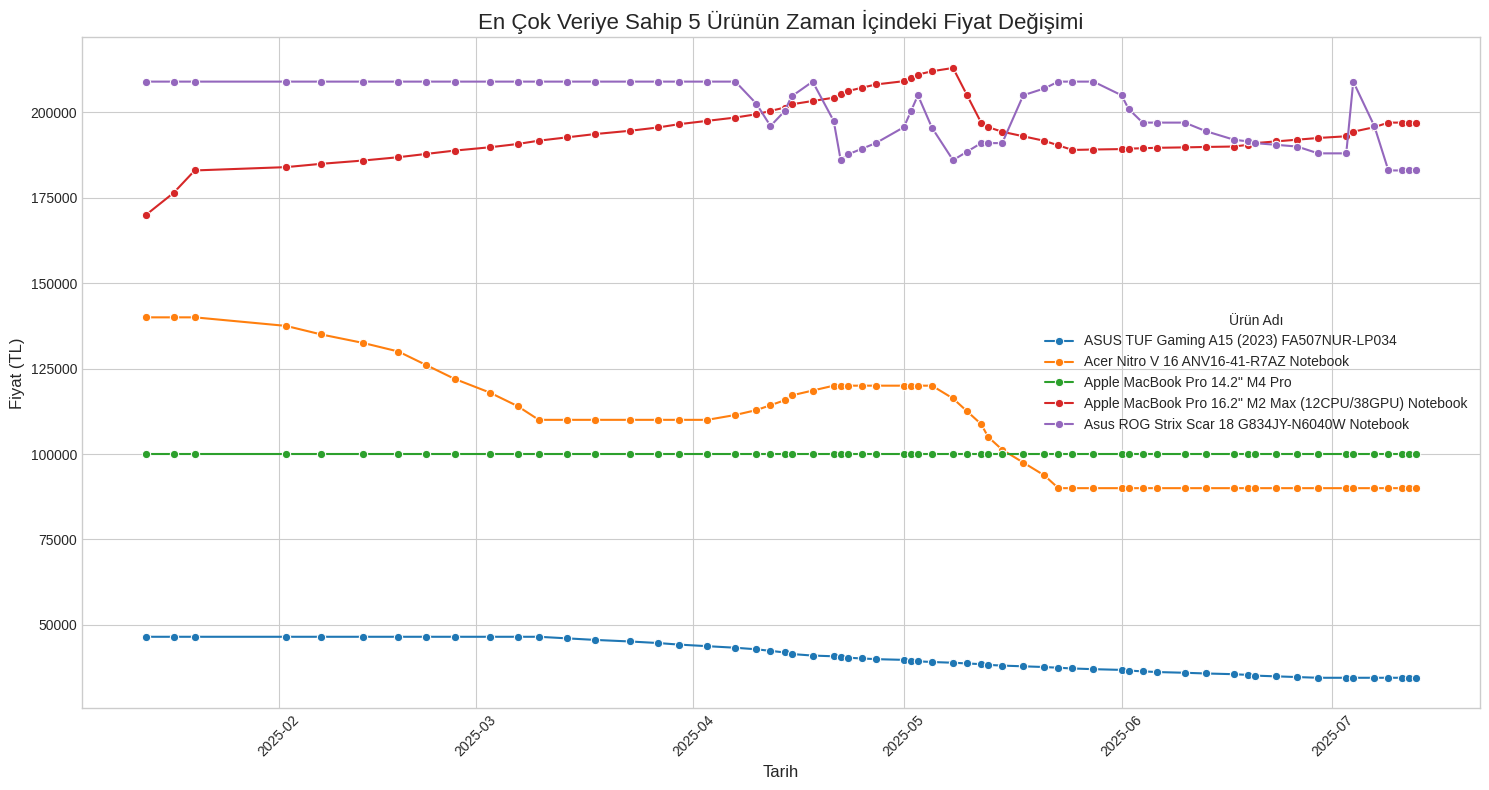

En √ßok veriye sahip 5 √ºr√ºn√ºn fiyat trend grafiƒüi 'top5_products_price_trends.png' adƒ±yla kaydedildi.


<Figure size 640x480 with 0 Axes>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Temizlenmi≈ü veriyi y√ºkle
cleaned_file_name = 'cleaned_product_prices.csv'
df_long = pd.read_csv(cleaned_file_name, parse_dates=['Tarih'])


# --- Visualization ---

# En √ßok veri noktasƒ±na sahip ilk 5 √ºr√ºn√º bul
top_products = df_long['√úr√ºn Adƒ±'].value_counts().nlargest(5).index

# DataFrame'i sadece ilk 5 √ºr√ºn√º i√ßerecek ≈üekilde filtrele
df_top_products = df_long[df_long['√úr√ºn Adƒ±'].isin(top_products)]

# Grafik stilini ayarla
plt.style.use('seaborn-v0_8-whitegrid')

# Grafiƒüi olu≈ütur
plt.figure(figsize=(15, 8))

#√áizgi grafiƒüini √ßiz
sns.lineplot(data=df_top_products, x='Tarih', y='Fiyat', hue='√úr√ºn Adƒ±', marker='o')

# Ba≈ülƒ±k ve etiketleri ayarla
plt.title('En √áok Veriye Sahip 5 √úr√ºn√ºn Zaman ƒ∞√ßindeki Fiyat Deƒüi≈üimi', fontsize=16)
plt.xlabel('Tarih', fontsize=12)
plt.ylabel('Fiyat (TL)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='√úr√ºn Adƒ±')

# Etiketlerin √ºst √ºste binmemesi i√ßin d√ºzeni sƒ±kƒ±la≈ütƒ±r
plt.tight_layout()

plt.show()
# Grafiƒüi bir dosyaya kaydet
plt.savefig('top5_products_price_trends.png')

print("En √ßok veriye sahip 5 √ºr√ºn√ºn fiyat trend grafiƒüi 'top5_products_price_trends.png' adƒ±yla kaydedildi.")

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_51ofzp1/3ajvmdz9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_51ofzp1/17z8m56t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31288', 'data', 'file=/tmp/tmp_51ofzp1/3ajvmdz9.json', 'init=/tmp/tmp_51ofzp1/17z8m56t.json', 'output', 'file=/tmp/tmp_51ofzp1/prophet_modelf5ig2yw6/prophet_model-20250716073504.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:35:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


--- MODEL PERFORMANS METRƒ∞KLERƒ∞ (Geli≈ümi≈ü Model) ---
Ortalama Mutlak Hata (MAE): 140.91 TL
K√∂k Ortalama Karesel Hata (RMSE): 171.16 TL
Ortalama Mutlak Y√ºzde Hata (MAPE): %1.08
------------------------------


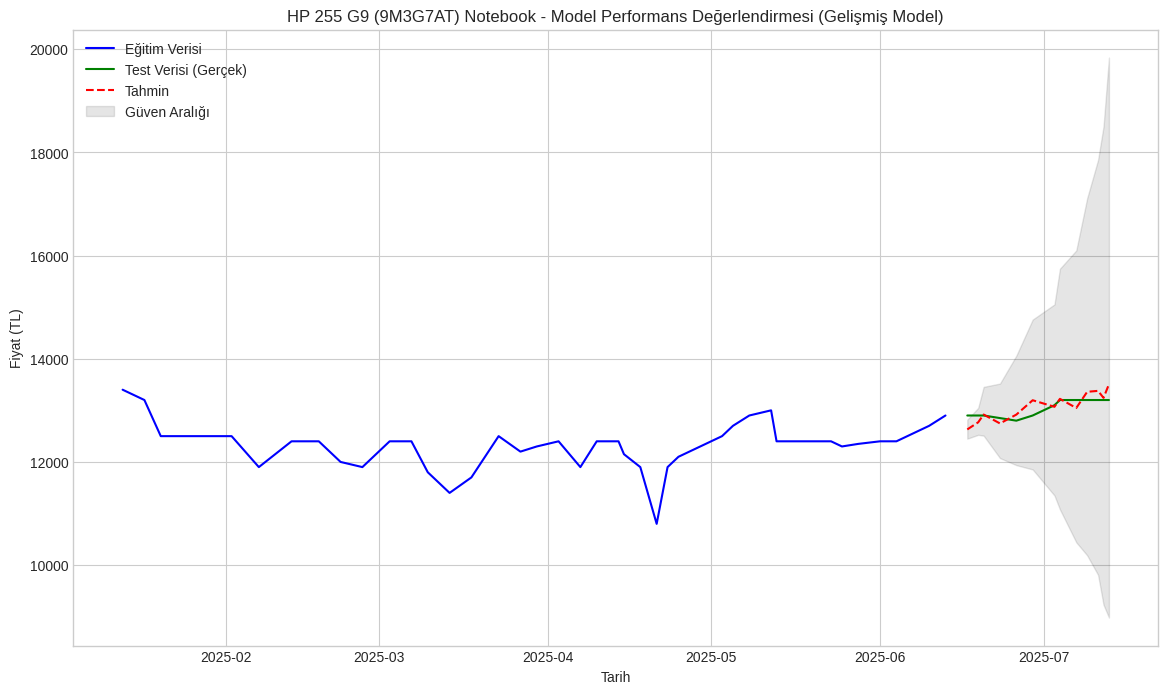

In [18]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# --- 1. Veriyi ve Tatil Bilgilerini Y√ºkle ---
cleaned_file_name = 'cleaned_product_prices.csv'
df_long = pd.read_csv(cleaned_file_name, parse_dates=['Tarih'])
product_to_analyze = 'HP 255 G9 (9M3G7AT) Notebook'
df_product = df_long[df_long['√úr√ºn Adƒ±'] == product_to_analyze].copy()

# Prophet i√ßin veriyi hazƒ±rla
df_prophet = df_product[['Tarih', 'Fiyat']].rename(columns={'Tarih': 'ds', 'Fiyat': 'y'})

# Tatil DataFrame'lerini olu≈ütur (Bu kƒ±sƒ±m sizin orijinal kodunuzda mevcut)
holidays_df = pd.DataFrame({
      'holiday': 'resmi_tatil',
      'ds': pd.to_datetime([
          '2025-01-01', '2025-04-23', '2025-05-01', '2025-05-19',
          '2025-07-15', '2025-08-30', '2025-10-29',
      ]),
      'lower_window': 0, 'upper_window': 1,
    })
bayramlar_df = pd.DataFrame({
        'holiday': 'dini_bayram',
        'ds': pd.to_datetime(['2025-03-30', '2025-03-31', '2025-04-01',
                             '2025-06-06', '2025-06-07', '2025-06-08', '2025-06-09']),
        'lower_window': -2, 'upper_window': 2,
    })
sektorel_olaylar_df = pd.DataFrame({
        'holiday': 'yeni_seri_cikisi',
        'ds': pd.to_datetime(['2024-01-08', '2024-01-17']),
        'lower_window': 0, 'upper_window': 10,
    })
all_holidays = pd.concat([holidays_df, bayramlar_df, sektorel_olaylar_df])


# --- 2. Veriyi Eƒüitim ve Test Olarak Ayƒ±r (%80 Eƒüitim, %20 Test) ---
split_point = int(len(df_prophet) * 0.8)
train_data = df_prophet.iloc[:split_point]
test_data = df_prophet.iloc[split_point:]


# --- 3. Modeli SADECE Eƒüitim Verisiyle Kur ve Eƒüit (Sƒ∞Zƒ∞N MODELƒ∞Nƒ∞ZLE) ---
train_data_log = train_data.copy()
train_data_log['y'] = np.log(train_data_log['y'])

# Prophet modelini sizin belirlediƒüiniz geli≈ümi≈ü parametrelerle kuruyoruz
model_eval = Prophet(
    holidays=all_holidays,                 # Tatil verilerini ekledik
    seasonality_mode='multiplicative',   # Mevsimsellik modunu 'multiplicative' olarak belirttik
    changepoint_prior_scale=0.1          # Esneklik parametresini sizin deƒüerinize g√∂re ayarladƒ±k
)
model_eval.fit(train_data_log)


# --- 4. Test Verisi √úzerinde Tahmin Yap ve Deƒüerlendir ---
future_eval = test_data[['ds']]
forecast_eval = model_eval.predict(future_eval)

# Tahminleri orijinal √∂l√ßeƒüe geri √ßevir
forecast_eval['yhat'] = np.exp(forecast_eval['yhat'])
forecast_eval['yhat_lower'] = np.exp(forecast_eval['yhat_lower'])
forecast_eval['yhat_upper'] = np.exp(forecast_eval['yhat_upper'])

# Performans metriklerini hesapla
eval_df = pd.merge(test_data, forecast_eval[['ds', 'yhat']], on='ds')
mae = mean_absolute_error(eval_df['y'], eval_df['yhat'])
rmse = np.sqrt(mean_squared_error(eval_df['y'], eval_df['yhat']))
mape = np.mean(np.abs((eval_df['y'] - eval_df['yhat']) / eval_df['y'])) * 100

print("--- MODEL PERFORMANS METRƒ∞KLERƒ∞ (Geli≈ümi≈ü Model) ---")
print(f"Ortalama Mutlak Hata (MAE): {mae:,.2f} TL")
print(f"K√∂k Ortalama Karesel Hata (RMSE): {rmse:,.2f} TL")
print(f"Ortalama Mutlak Y√ºzde Hata (MAPE): %{mape:.2f}")
print("-" * 30)

# Sonu√ßlarƒ± g√∂rselle≈ütir
plt.figure(figsize=(14, 8))
plt.plot(train_data['ds'], train_data['y'], 'b-', label='Eƒüitim Verisi')
plt.plot(test_data['ds'], test_data['y'], 'g-', label='Test Verisi (Ger√ßek)')
plt.plot(forecast_eval['ds'], forecast_eval['yhat'], 'r--', label='Tahmin')
plt.fill_between(forecast_eval['ds'], forecast_eval['yhat_lower'], forecast_eval['yhat_upper'], color='k', alpha=0.1, label='G√ºven Aralƒ±ƒüƒ±')
plt.title(f'{product_to_analyze} - Model Performans Deƒüerlendirmesi (Geli≈ümi≈ü Model)')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (TL)')
plt.legend()
plt.grid(True)
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_51ofzp1/ihlxqb11.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_51ofzp1/d1ooh15e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64585', 'data', 'file=/tmp/tmp_51ofzp1/ihlxqb11.json', 'init=/tmp/tmp_51ofzp1/d1ooh15e.json', 'output', 'file=/tmp/tmp_51ofzp1/prophet_modeltp98n39c/prophet_model-20250716071545.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:15:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


'HP 255 G9 (9M3G7AT) Notebook' i√ßin veri hazƒ±rlanƒ±yor...
            ds         y
806 2025-01-13  9.503010
807 2025-01-17  9.487972
808 2025-01-20  9.433484
809 2025-02-02  9.433484
810 2025-02-07  9.384294


07:15:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Tahmin sonu√ßlarƒ± olu≈üturuluyor ve grafik √ßiziliyor...
           ds          yhat    yhat_lower    yhat_upper
87 2025-08-08  13628.953471  11166.481314  16834.735074
88 2025-08-09  13571.836369  10935.820120  16995.648178
89 2025-08-10  13704.796408  10940.282029  17331.441700
90 2025-08-11  13510.334892  10651.726253  17269.450326
91 2025-08-12  13588.307884  10590.953179  17590.929972


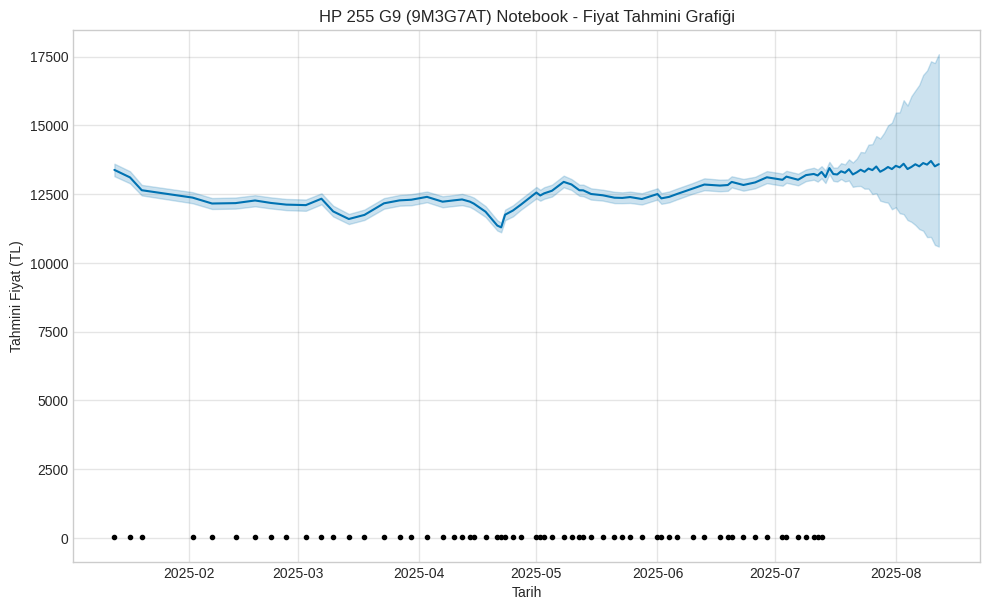

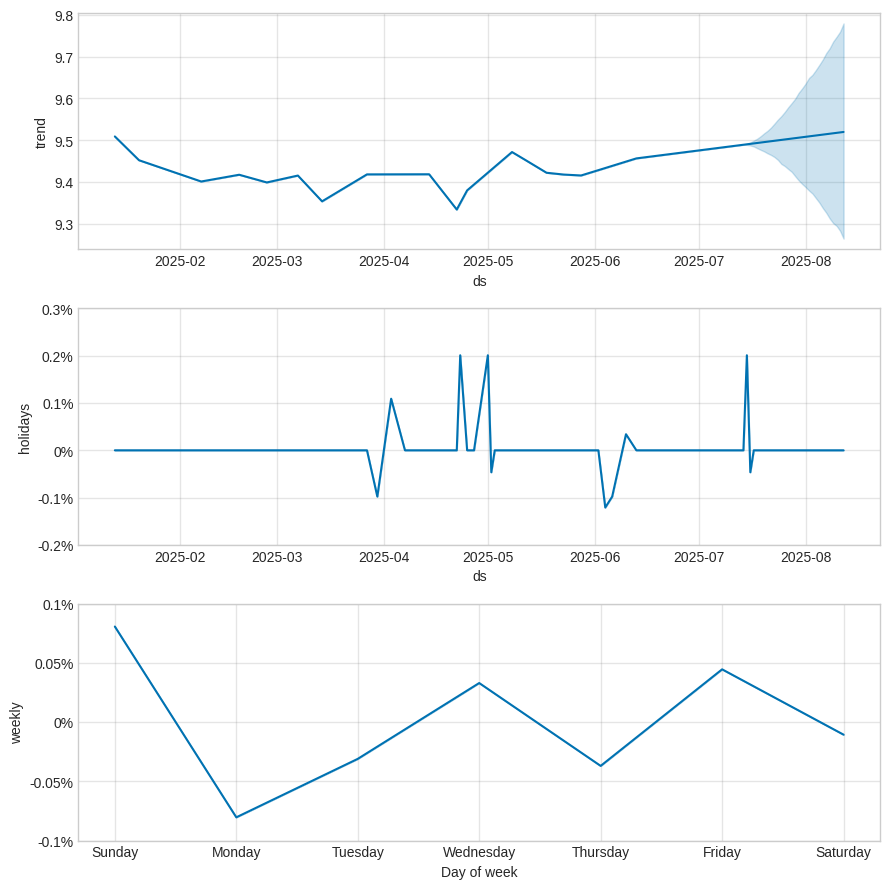

In [11]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np

# Temizlenmi≈ü veriyi y√ºkle
cleaned_file_name = 'cleaned_product_prices.csv'
df_long = pd.read_csv(cleaned_file_name, parse_dates=['Tarih'])

# Analiz edilecek √ºr√ºn√º se√ß
product_to_analyze = 'HP 255 G9 (9M3G7AT) Notebook'
df_product = df_long[df_long['√úr√ºn Adƒ±'] == product_to_analyze].copy()


# --- Prophet i√ßin Veriyi Hazƒ±rlama ---

# Prophet, s√ºtunlarƒ±n 'ds' (datestamp) ve 'y' (value) olarak adlandƒ±rƒ±lmasƒ±nƒ± bekler.
df_prophet = df_product[['Tarih', 'Fiyat']].rename(columns={'Tarih': 'ds', 'Fiyat': 'y'})

# logaritmik d√∂n√º≈ü√ºm uygula
df_prophet['y'] = np.log(df_prophet['y']) # Logaritmik d√∂n√º≈ü√ºm burada!


# 2025 i√ßin T√ºrkiye'deki resmi ve √∂zel g√ºnleri i√ßeren kapsamlƒ± bir liste
holidays_df = pd.DataFrame({
      'holiday': 'resmi_tatil',
      'ds': pd.to_datetime([
          '2025-01-01', # Yƒ±lba≈üƒ±
          '2025-04-23', # Ulusal Egemenlik ve √áocuk Bayramƒ±
          '2025-05-01', # Emek ve Dayanƒ±≈üma G√ºn√º
          '2025-05-19', # Atat√ºrk'√º Anma, Gen√ßlik ve Spor Bayramƒ±
          '2025-07-15', # Demokrasi ve Milli Birlik G√ºn√º
          '2025-08-30', # Zafer Bayramƒ±
          '2025-10-29', # Cumhuriyet Bayramƒ±
      ]),
      'lower_window': 0,
      'upper_window': 1,
    })

# Dini bayramlar
bayramlar_df = pd.DataFrame({
        'holiday': 'dini_bayram',
        'ds': pd.to_datetime(['2025-03-30', '2025-03-31', '2025-04-01', # Ramazan Bayramƒ±
                             '2025-06-06', '2025-06-07', '2025-06-08', '2025-06-09']), # Kurban Bayramƒ±
        'lower_window': -2, # Etkisi 2 g√ºn √∂nce ba≈ülasƒ±n
        'upper_window': 2,  # 2 g√ºn sonraya kadar s√ºrs√ºn
    })

# Sekt√∂rel olaylar (yeni teknoloji √ßƒ±kƒ±≈üƒ± gibi)
sektorel_olaylar_df = pd.DataFrame({
        'holiday': 'yeni_seri_cikisi',
        'ds': pd.to_datetime([
            '2024-01-08', # Intel 14. Nesil mobil i≈ülemci duyurusu
            '2024-01-17', # NVIDIA RTX 40 Super serisi √ßƒ±kƒ±≈üƒ±
        ]),
        'lower_window': 0,
        'upper_window': 10, # Etkisi 10 g√ºn s√ºrebilir
    })

# T√ºm listeleri birle≈ütir
all_holidays = pd.concat([holidays_df, bayramlar_df, sektorel_olaylar_df])

print(f"'{product_to_analyze}' i√ßin veri hazƒ±rlanƒ±yor...")
print(df_prophet.head())


# ---Prophet Modelini Kurma---
# Fiyat verisi olduƒüu i√ßin 'multiplicative' mevsimsellik daha iyi sonu√ß verebilir
model = Prophet(
    holidays=all_holidays,
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.1 # Trend esnekliƒüi
    )

# Modeli Eƒüitme
model.fit(df_prophet)

# --- Gelecek Tahmini Yapma ---
# Tahmin yapƒ±lacak gelecek zaman dilimini olu≈ütur (√∂rneƒüin 30 g√ºn)
future = model.make_future_dataframe(periods=30)

# Tahmin yap
forecast = model.predict(future)

# Logaritmik d√∂n√º≈ü√ºm√ºn etkilerini gidermek i√ßin tahminleri geri d√∂n√º≈üt√ºrelim (np.exp)
forecast['yhat'] = np.exp(forecast['yhat'])
forecast['yhat_lower'] = np.exp(forecast['yhat_lower'])
forecast['yhat_upper'] = np.exp(forecast['yhat_upper'])

# Ayrƒ±ca ger√ßek veriyi de geri d√∂n√º≈üt√ºrelim (anomali tespiti i√ßin)
df_prophet['y'] = np.exp(df_prophet['y'])

print("\nTahmin sonu√ßlarƒ± olu≈üturuluyor ve grafik √ßiziliyor...")

# Tahminin ilk birka√ß satƒ±rƒ±nƒ± g√∂ster
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Prophet'in plot fonksiyonu ile tahmini √ßizdir
fig = model.plot(forecast)
plt.title(f'{product_to_analyze} - Fiyat Tahmini Grafiƒüi')
plt.xlabel('Tarih')
plt.ylabel('Tahmini Fiyat (TL)')
plt.show()

# Prophet'in trend, haftalƒ±k ve yƒ±llƒ±k mevsimsellik gibi bile≈üenleri
# ayrƒ± ayrƒ± √ßizdirmesini saƒülayan fonksiyon
fig2 = model.plot_components(forecast)
plt.show()

--- Anomali Tespiti Sonu√ßlarƒ± (Potansiyel ƒ∞ndirim G√ºnleri) ---
A≈üaƒüƒ±daki tarihlerde beklenmedik fiyat d√º≈ü√º≈üleri tespit edildi:
           ds        y    yhat_lower
4  2025-02-07  11900.0  11957.139993
18 2025-04-07  11900.0  12020.393550
24 2025-04-21  10800.0  11174.484638
36 2025-05-13  12400.0  12423.963697


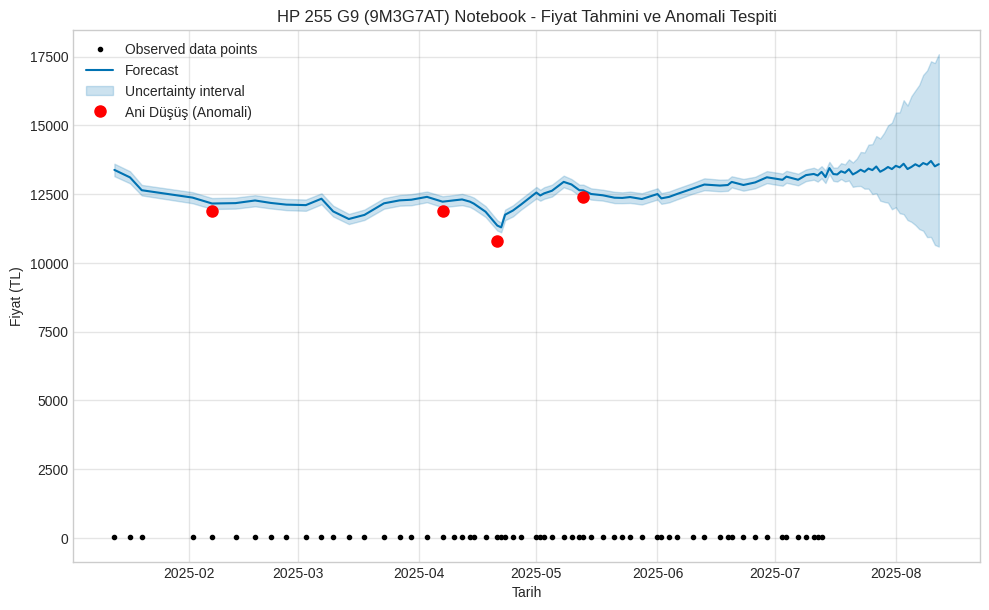

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Anomali Tespiti ---

# Ger√ßek verileri (df_prophet) ve tahminleri (forecast) birle≈ütirelim.
performance = pd.merge(df_prophet, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')

# Anomaliyi belirle: Ger√ßek fiyat (y), tahminin alt sƒ±nƒ±rƒ±ndan (yhat_lower) daha d√º≈ü√ºk m√º?
# Modelin hatasƒ±nƒ± (artƒ±k deƒüerleri) hesapla
performance['error'] = performance['y'] - performance['yhat']

# Hatalarƒ±n ortalamasƒ±nƒ± ve standart sapmasƒ±nƒ± bul
error_mean = performance['error'].mean()
error_std = performance['error'].std()
# Not: Standart sapma, hatalarƒ±n ortalamadan ne kadar saptƒ±ƒüƒ±nƒ±n bir √∂l√ß√ºs√ºd√ºr.

# Anomaliyi yeniden tanƒ±mla:
# Hata, ortalamadan 'N' standart sapma daha d√º≈ü√ºkse bu bir anomalidir.
N = 1.5
performance['anomaly'] = performance['error'] < (error_mean - N * error_std)

# Anomali olarak tespit edilen tarihleri bul
anomalies = performance[performance['anomaly'] == True]

print("--- Anomali Tespiti Sonu√ßlarƒ± (Potansiyel ƒ∞ndirim G√ºnleri) ---")
if anomalies.empty:
    print("Modelin beklentisinin altƒ±nda ani bir fiyat d√º≈ü√º≈ü√º (anomali) tespit edilmedi.")
else:
    print("A≈üaƒüƒ±daki tarihlerde beklenmedik fiyat d√º≈ü√º≈üleri tespit edildi:")
    print(anomalies[['ds', 'y', 'yhat_lower']])

# --- Anomali G√∂rselle≈ütirme ---

# Tahmin grafiƒüini yeniden √ßizdir
fig = model.plot(forecast) # model.plot() fonksiyonu da tahminleri geri d√∂n√º≈üt√ºr√ºlm√º≈ü olarak alƒ±r

# Grafik √ºzerine anomalileri kƒ±rmƒ±zƒ± noktalarla ekle
plt.plot(anomalies['ds'], anomalies['y'], 'ro', markersize=8, label='Ani D√º≈ü√º≈ü (Anomali)')

plt.title(f'{product_to_analyze} - Fiyat Tahmini ve Anomali Tespiti')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (TL)')
plt.legend()
plt.show()

In [13]:
import pandas as pd

# --- Rapor √úretimi ---

# Son bilinen ger√ßek fiyatƒ± alalƒ±m
last_real_price = df_prophet['y'].iloc[-1]
last_real_date = df_prophet['ds'].iloc[-1]

# Tahmin d√∂neminin sonundaki (30 g√ºn sonraki) tahmini fiyatƒ± alalƒ±m
predicted_price_in_30_days = forecast['yhat'].iloc[-1]
predicted_date = forecast['ds'].iloc[-1]

# Y√ºzdelik deƒüi≈üimi hesaplayalƒ±m
percentage_change = ((predicted_price_in_30_days - last_real_price) / last_real_price) * 100

# Raporu olu≈ütur
print("="*60)
print(f"√úR√úN BAZLI Fƒ∞YAT TAHMƒ∞Nƒ∞ VE TREND ANALƒ∞Zƒ∞ RAPORU")
print("="*60)
print(f"Analiz Edilen √úr√ºn: {product_to_analyze}\n")

print("--- GELECEK Fƒ∞YAT TAHMƒ∞Nƒ∞ (√ñn√ºm√ºzdeki 30 G√ºn) ---")
print(f"Son bilinen fiyat ({last_real_date.strftime('%Y-%m-%d')}): {last_real_price:,.2f} TL")
print(f"Tahmin edilen fiyat ({predicted_date.strftime('%Y-%m-%d')}): {predicted_price_in_30_days:,.2f} TL")

if percentage_change > 0:
    print(f"Tahmin: Bu √ºr√ºn√ºn fiyatƒ±nƒ±n √∂n√ºm√ºzdeki 30 g√ºn i√ßinde yakla≈üƒ±k %{abs(percentage_change):.2f} artmasƒ± bekleniyor. üìà")
else:
    print(f"Tahmin: Bu √ºr√ºn√ºn fiyatƒ±nƒ±n √∂n√ºm√ºzdeki 30 g√ºn i√ßinde yakla≈üƒ±k %{abs(percentage_change):.2f} d√º≈ümesi bekleniyor. üìâ")
print("\n")


print("--- GE√áMƒ∞≈û KAMPANYA D√ñNEMƒ∞ ANALƒ∞Zƒ∞ (Anomali Tespiti) ---")
if anomalies.empty:
    print("Ge√ßmi≈ü verilerde kayda deƒüer bir kampanya veya ani fiyat d√º≈ü√º≈ü√º tespit edilmedi.")
else:
    print("Model, a≈üaƒüƒ±daki tarihlerde standart trendin dƒ±≈üƒ±nda ani fiyat d√º≈ü√º≈üleri tespit etti:")
    for index, row in anomalies.iterrows():
        date_str = row['ds'].strftime('%Y-%m-%d')
        real_price = row['y']
        expected_lower_price = row['yhat_lower']
        print(f"  - {date_str}: Fiyat {real_price:,.2f} TL'ye d√º≈üt√º. (Beklenen en d√º≈ü√ºk fiyat {expected_lower_price:,.2f} TL idi)")
print("\n")
print("="*60)
print("Rapor Sonu.")
print("="*60)

√úR√úN BAZLI Fƒ∞YAT TAHMƒ∞Nƒ∞ VE TREND ANALƒ∞Zƒ∞ RAPORU
Analiz Edilen √úr√ºn: HP 255 G9 (9M3G7AT) Notebook

--- GELECEK Fƒ∞YAT TAHMƒ∞Nƒ∞ (√ñn√ºm√ºzdeki 30 G√ºn) ---
Son bilinen fiyat (2025-07-13): 13,200.00 TL
Tahmin edilen fiyat (2025-08-12): 13,588.31 TL
Tahmin: Bu √ºr√ºn√ºn fiyatƒ±nƒ±n √∂n√ºm√ºzdeki 30 g√ºn i√ßinde yakla≈üƒ±k %2.94 artmasƒ± bekleniyor. üìà


--- GE√áMƒ∞≈û KAMPANYA D√ñNEMƒ∞ ANALƒ∞Zƒ∞ (Anomali Tespiti) ---
Model, a≈üaƒüƒ±daki tarihlerde standart trendin dƒ±≈üƒ±nda ani fiyat d√º≈ü√º≈üleri tespit etti:
  - 2025-02-07: Fiyat 11,900.00 TL'ye d√º≈üt√º. (Beklenen en d√º≈ü√ºk fiyat 11,957.14 TL idi)
  - 2025-04-07: Fiyat 11,900.00 TL'ye d√º≈üt√º. (Beklenen en d√º≈ü√ºk fiyat 12,020.39 TL idi)
  - 2025-04-21: Fiyat 10,800.00 TL'ye d√º≈üt√º. (Beklenen en d√º≈ü√ºk fiyat 11,174.48 TL idi)
  - 2025-05-13: Fiyat 12,400.00 TL'ye d√º≈üt√º. (Beklenen en d√º≈ü√ºk fiyat 12,423.96 TL idi)


Rapor Sonu.


In [14]:
!pip install streamlit pandas prophet matplotlib

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10.1/10.1 MB 72.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6.9/6.9 MB 102.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 79.1/79.1 kB 6.4 MB/s eta 0:00:00


In [15]:
# Gerekli k√ºt√ºphaneleri y√ºkle(uygulama i√ßin)
!pip install streamlit pyngrok -q

In [16]:
# Streamlit uygulama kodunu app.py dosyasƒ±na yazƒ±n
%%writefile app.py

import streamlit as st
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np

# --- Sayfa Ayarlarƒ± ve Ba≈ülƒ±k ---
st.set_page_config(page_title="E-Ticaret Fiyat Analizi", layout="wide")
st.title("üõçÔ∏è E-Ticaret √úr√ºnleri ƒ∞√ßin Fiyat Tahmini ve Trend Analizi")
st.write("Bu uygulama, se√ßilen bir √ºr√ºn√ºn ge√ßmi≈ü fiyat verilerini analiz eder, gelecekteki 30 g√ºn i√ßin fiyat tahmini yapar ve potansiyel kampanya d√∂nemlerini tespit eder.")

# --- Veriyi Y√ºkleme ve √ñnbelleƒüe Alma ---\
@st.cache_data
def load_data():
    try:
        df = pd.read_csv('cleaned_product_prices.csv', parse_dates=['Tarih'])
        return df
    except FileNotFoundError:
        return None

df_long = load_data()

if df_long is None:
    st.error("HATA: 'cleaned_product_prices.csv' dosyasƒ± bulunamadƒ±. L√ºtfen sol taraftaki 'Dosyalar' b√∂l√ºm√ºne y√ºklediƒüinizden emin olun.")
    st.stop()

# --- Kullanƒ±cƒ±dan √úr√ºn Se√ßimini Alma (Sidebar) ---
st.sidebar.header("Analiz Ayarlarƒ±")
product_list = df_long['√úr√ºn Adƒ±'].unique()
selected_product = st.sidebar.selectbox(
    "L√ºtfen analiz etmek i√ßin bir √ºr√ºn se√ßin:",
    product_list
)

# --- Analiz Fonksiyonu ---
@st.cache_data
def run_analysis(product_name):
    df_product = df_long[df_long['√úr√ºn Adƒ±'] == product_name].copy()
    df_prophet = df_product[['Tarih', 'Fiyat']].rename(columns={'Tarih': 'ds', 'Fiyat': 'y'})

    if len(df_prophet) < 5:
        return None, None, None, "Bu √ºr√ºn√ºn analizi i√ßin yeterli veri (en az 5 nokta) bulunmamaktadƒ±r."

    # Fiyat s√ºtununda sƒ±fƒ±r veya negatif deƒüer olmadƒ±ƒüƒ±ndan emin olun ve log d√∂n√º≈ü√ºm√º i√ßin k√º√ß√ºk bir sabit ekleyin
    min_val_for_log = 1
    df_prophet['y'] = df_prophet['y'] + min_val_for_log
    df_prophet['y'] = np.log(df_prophet['y'])


    model = Prophet(changepoint_prior_scale=0.05,
                    yearly_seasonality=False,
                    weekly_seasonality=True,
                    daily_seasonality=False)
    model.fit(df_prophet)
    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)

    # Tahminleri orijinal fiyat √∂l√ßeƒüine geri √ßevir ve eklenen sabiti geri √ßƒ±kar
    forecast['yhat'] = np.exp(forecast['yhat']) - min_val_for_log
    forecast['yhat_lower'] = np.exp(forecast['yhat_lower']) - min_val_for_log
    forecast['yhat_upper'] = np.exp(forecast['yhat_upper']) - min_val_for_log

    # Fiyatlarƒ±n negatif olmamasƒ±nƒ± garanti altƒ±na almak i√ßin 0 ile sƒ±nƒ±rla
    forecast['yhat'] = forecast['yhat'].clip(lower=0)
    forecast['yhat_lower'] = forecast['yhat_lower'].clip(lower=0)
    forecast['yhat_upper'] = forecast['yhat_upper'].clip(lower=0)


    # Anomali tespiti i√ßin df_product'taki orijinal Fiyat deƒüerlerini kullanƒ±yoruz
    original_prices_for_performance = df_product[['Tarih', 'Fiyat']].rename(columns={'Tarih': 'ds', 'Fiyat': 'y'})


    performance = pd.merge(original_prices_for_performance, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')
    performance['anomaly'] = performance.apply(lambda rows: rows['y'] < rows['yhat_lower'], axis=1)
    anomalies = performance[performance['anomaly'] == True]

    # Grafiƒüi √ßizerken geri d√∂n√º≈üt√ºr√ºlm√º≈ü forecast ve anomalies verilerini kullanƒ±n
    fig1 = model.plot(forecast)
    plt.plot(anomalies['ds'], anomalies['y'], 'ro', markersize=8, label='Ani D√º≈ü√º≈ü (Anomali)')
    plt.title(f'{product_name} - Fiyat Tahmini ve Anomali Tespiti', fontsize=16)
    plt.xlabel('Tarih')
    plt.ylabel('Fiyat (TL)')
    plt.legend()

    # Raporlama i√ßin son ger√ßek fiyatƒ± df_product'tan al
    last_real_price = df_product['Fiyat'].iloc[-1]
    last_real_date = df_product['Tarih'].iloc[-1]
    predicted_price_in_30_days = forecast['yhat'].iloc[-1]

    # Y√ºzdelik deƒüi≈üimi hesaplarken, 0'a b√∂lme hatasƒ±nƒ± √∂nlemek i√ßin kontrol ekleyin
    if last_real_price == 0:
        percentage_change = float('inf') if predicted_price_in_30_days > 0 else 0
    else:
        percentage_change = ((predicted_price_in_30_days - last_real_price) / last_real_price) * 100

    # Rapor metnini satƒ±r satƒ±r listeleyip birle≈ütirerek daha saƒülam Markdown √ßƒ±ktƒ±sƒ± alalƒ±m
    report_lines = []
    report_lines.append("### üìà Gelecek Fiyat Tahmini (√ñn√ºm√ºzdeki 30 G√ºn)")
    report_lines.append(f"- **Son bilinen fiyat ({last_real_date.strftime('%Y-%m-%d')}):** `{last_real_price:,.2f} TL`")
    report_lines.append(f"- **30 g√ºn sonrasƒ± i√ßin tahmin edilen fiyat:** `{predicted_price_in_30_days:,.2f} TL`")
    report_lines.append(f"- **Tahmin:** Bu √ºr√ºn√ºn fiyatƒ±nƒ±n √∂n√ºm√ºzdeki 30 g√ºn i√ßinde yakla≈üƒ±k **`%{percentage_change:.2f}`** oranƒ±nda deƒüi≈ümesi bekleniyor.")
    report_text = "\n".join(report_lines) # Satƒ±rlarƒ± \n ile birle≈ütir

    anomaly_text_lines = []
    anomaly_text_lines.append("### üìâ Ge√ßmi≈ü Kampanya D√∂nemi Analizi")
    if anomalies.empty:
        anomaly_text_lines.append("Ge√ßmi≈ü verilerde kayda deƒüer bir kampanya veya ani fiyat d√º≈ü√º≈ü√º tespit edilmedi.")
    else:
        anomaly_text_lines.append("Model, a≈üaƒüƒ±daki tarihlerde standart trendin dƒ±≈üƒ±nda ani fiyat d√º≈ü√º≈üleri tespit etti:")
        for _, row in anomalies.iterrows():
            anomaly_text_lines.append(f"- **{row['ds'].strftime('%Y-%m-%d')}:** Fiyat `{row['y']:,.2f} TL`'ye d√º≈üt√º (Beklenen en d√º≈ü√ºk fiyat `{row['yhat_lower']:,.2f} TL` idi).")

    anomaly_text = "\n".join(anomaly_text_lines) # Satƒ±rlarƒ± \n ile birle≈ütir

    final_report = report_text + "\n\n" + anomaly_text # ƒ∞ki \n ile yeni paragraf olu≈ütur
    return fig1, final_report, df_product.sort_values(by='Tarih', ascending=False), None

# --- Se√ßilen √úr√ºne G√∂re Analizi √áalƒ±≈ütƒ±rma ve Sonu√ßlarƒ± G√∂sterme ---
if selected_product:
    st.header(f"üîé Analiz Sonu√ßlarƒ±: {selected_product}")
    fig, report, df_history, error_message = run_analysis(selected_product)
    if error_message:
        st.warning(error_message)
    else:
        st.markdown(report)
        st.pyplot(fig)
        with st.expander("Ge√ßmi≈ü Fiyat Verilerini G√∂r√ºnt√ºle"):
            st.dataframe(df_history)

Writing app.py


In [17]:
# ngrok kimliƒüini ile uygulamayƒ± √ßalƒ±≈ütƒ±r
from pyngrok import ngrok
from google.colab import userdata
import os

try:
    NGROK_AUTH_TOKEN = userdata.get('NGROK_AUTH_TOKEN')
    ngrok.set_auth_token(NGROK_AUTH_TOKEN)
    print("Ngrok kimlik doƒürulamasƒ± ba≈üarƒ±lƒ±.")

    # Streamlit'in √ßalƒ±≈ütƒ±ƒüƒ± varsayƒ±lan port olan 8501'i ngrok'a y√∂nlendir
    public_url = ngrok.connect(8501)
    print(f"Uygulamaya eri≈ümek i√ßin bu linke tƒ±klayƒ±n: {public_url}")

    # app.py dosyasƒ±nƒ±n varlƒ±ƒüƒ±nƒ± kontrol et
    if not os.path.exists('app.py'):
        print("\nUYARI: 'app.py' dosyasƒ± bulunamadƒ±. L√ºtfen bir √∂nceki adƒ±mdaki '%%writefile app.py' h√ºcresini tekrar √ßalƒ±≈ütƒ±rdƒ±ƒüƒ±nƒ±zdan emin olun.")
    else:
        # Uygulamayƒ± arka planda √ßalƒ±≈ütƒ±r
        !streamlit run app.py &

except Exception as e:
    print(f"\nBir hata olu≈ütu: {e}")
    print("\nL√ºtfen Adƒ±m B'yi (Colab Secrets/Gizlilik) doƒüru yaptƒ±ƒüƒ±nƒ±zdan emin olun. 'NGROK_AUTH_TOKEN' isminin doƒüru yazƒ±ldƒ±ƒüƒ±nƒ± ve anahtarƒ± yapƒ±≈ütƒ±rdƒ±ƒüƒ±nƒ±zƒ± kontrol edin.")

Ngrok kimlik doƒürulamasƒ± ba≈üarƒ±lƒ±.
Uygulamaya eri≈ümek i√ßin bu linke tƒ±klayƒ±n: NgrokTunnel: "https://101a9dfb2f84.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.56.13.222:8501

07:17:34 - cmdstanpy - INFO - Chain [1] start processing
07:17:34 - cmdstanpy - INFO - Chain [1] done processing
07:17:59 - cmdstanpy - INFO - Chain [1] start processing
07:17:59 - cmdstanpy - INFO - Chain [1] done processing
07:18:36 - cmdstanpy - INFO - Chain [1] start processing
07:18:36 - cmdstanpy - INFO - Chain [1] done processing
  Stopping...
